<IPython.core.display.Javascript object>


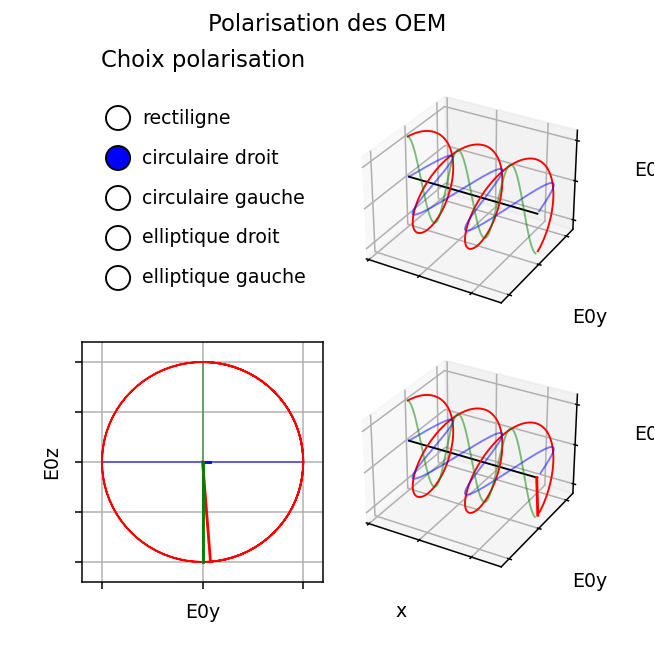

In [2]:
%matplotlib notebook
# on importe des bibliothèques, des fonctions
from math import sin, pi
# pour pouvoir tracer des courbes, on a besoin de 'pyplot' objet du module 'matplotlib'
from matplotlib import pyplot as plt
# librairie 3D
import mpl_toolkits.mplot3d.axes3d as p3
# ajout curseur et bouton
from matplotlib.widgets import RadioButtons
# ajout module animation de la figure
import matplotlib.animation as animation
import numpy as np
from matplotlib.pylab import *

# une fonction pour calculer plus vite l'onde
def mononde(amplitude,periode,phasedegre,x):
	return amplitude*sin(2*pi*x/periode+phasedegre*pi/180)

#max en x
Xmax=5.0
#nombre d'échantillons
NbEchantillons=200
#on définit les endroits où la courbe est évaluée
axeX=[i*Xmax/NbEchantillons for i in range(NbEchantillons)]
#période (longueur d'onde)
L = 2
#amplitude initiale pour E0Y et E0Z
amplitudeY = 0.5
amplitudeZ = 1
#phase initiale
phase = 0

# les courbes de la version statique 3D de la polarisation
def pol3DStatique(amplitudeY,phase):
    monondeY=[mononde(amplitudeY,2,0,x) for x in axeX]
    monondeZ=[mononde(amplitudeZ,2,phase,x) for x in axeX]
    Eyzdata=[0 for x in axeX]
    ls.set_data(axeX, monondeY)
    ls.set_3d_properties(monondeZ)
    Eys.set_data(axeX, monondeY)
    Eys.set_3d_properties(Eyzdata)
    Ezs.set_data(axeX, Eyzdata)
    Ezs.set_3d_properties(monondeZ)

# une fonction pour changer le type de polarisation
def pol(label):
    global amplitudeY
    global phase
    global anim
    ampldict = {'rectiligne': 0.5, 'circulaire droit': 1, 'circulaire gauche': 1, 'elliptique droit': 0.5, 'elliptique gauche' : 0.5}
    amplitudeY = ampldict[label]
    phdict = {'rectiligne': 0, 'circulaire droit' : 90, 'circulaire gauche' : -90, 'elliptique droit': 60, 'elliptique gauche' : -60}
    phase = phdict[label]
    xdata=axeX
    ydata=[mononde(amplitudeY,2,0,x) for x in axeX]
    zdata=[mononde(amplitudeZ,2,phase,x) for x in axeX]
    Eyzdata=[0 for x in axeX]
    dataSetl = np.array([xdata,ydata,zdata])
    fig.canvas.draw_idle()
    # figure statique de la polarisation
    pol3DStatique(amplitudeY,phase)
    # création de l'animmation des fonctions 3D et 2D
    anim = animation.FuncAnimation(fig, func, frames=NbEchantillons, fargs=(dataSetl,l), interval=5, init_func=init, blit = False, repeat=False)

# cree une figure et ses sous-figure
# figaspect(1)= ratio de 1 entre les axes
fig = figure(num=0,figsize=plt.figaspect(1))
fig.suptitle("Polarisation des OEM")
fig.subplots_adjust(hspace=0.1, wspace=0.1)

#sous-figure des choix de la polarisation
choix=subplot2grid((2,2),(0,0),colspan=1)
choix.set_title('Choix polarisation')
choix.axis('off')
# ajout bouton choix type polarisation
radio = RadioButtons(choix, ('rectiligne', 'circulaire droit', 'circulaire gauche','elliptique droit','elliptique gauche'))
choix.grid(False)
# action de changement d'amplitude et phase retrace la courbe
radio.on_clicked(pol)

#sous-figure de la réponse 3D statique
a0=subplot2grid((2,2),(0,1),colspan=1,projection='3d')
# on définit les axes (x,y,z), auxquels on rajoutera les courbes
# proprietes des axes
a0.set_xlim3d([0.0, Xmax])
a0.set_xlabel('x')
a0.set_ylim3d([-1.2, 1.2])
a0.set_ylabel('E0y')
a0.set_zlim3d([-1.2, 1.2])
a0.set_zlabel('E0z')
#a0.set_title('Polarisation 3D - Ey - Ez')
a0.spines['bottom'].set_position('zero')
a0.spines['top'].set_position('zero')
a0.spines['left'].set_color('none')
a0.spines['right'].set_color('none')
a0.grid(True)
# Turn off tick labels
a0.set_yticklabels([])
a0.set_xticklabels([])
a0.set_zticklabels([])
# on trace les courbes
a0.plot((0, Xmax), (0,0), (0,0), color='k', lw=1)
# courbes statiques deux composantes déphasées
ls, = a0.plot([],[],[],color='red',lw=1)
Eys, = a0.plot([],[],[],color='blue',lw=1, alpha=0.5)
Ezs, = a0.plot([],[],[],color='green',lw=1, alpha=0.5)

#sous-figure de la réponse 2D dynamique
a1=subplot2grid((2,2),(1,0),colspan=1)
a1.set_ylim(-1.2,1.2)
a1.set_xlim(-1.2,1.2)
a1.grid(True)
a1.set_xlabel("E0y")
a1.set_ylabel("E0z")
# Turn off tick labels
a1.set_yticklabels([])
a1.set_xticklabels([])
# courbes à tracer
Eyplan, = a1.plot([],[],color='blue',lw=1, alpha=0.5)
Ezplan, = a1.plot([],[],color='green',lw=1, alpha=0.5)
lplan, = a1.plot([],[],color='red',lw=1)
# vecteur champ électrique
Evect, = a1.plot([],[],color='red')
Eyvect, = a1.plot([],[], color='blue')
Ezvect, = a1.plot([],[], color='green')

#sous-figure de la réponse 3D dynamique
a2=subplot2grid((2,2),(1,1),colspan=1,projection='3d')
# on définit les axes (x,y,z), auxquels on rajoutera les courbes
# proprietes des axes
a2.set_xlim3d([0.0, Xmax])
a2.set_xlabel('x')
a2.set_ylim3d([-1.2, 1.2])
a2.set_ylabel('E0y')
a2.set_zlim3d([-1.2, 1.2])
a2.set_zlabel('E0z')
a2.spines['bottom'].set_position('zero')
a2.spines['top'].set_position('zero')
a2.spines['left'].set_color('none')
a2.spines['right'].set_color('none')
a2.grid(True)
# Turn off tick labels
a2.set_yticklabels([])
a2.set_xticklabels([])
a2.set_zticklabels([])
# on définit la courbe sur le graphique
a2.plot((0, Xmax), (0,0), (0,0), color='k', lw=1)
# NOTE: Can't pass empty arrays into 3d version of plot()
#l = pyplot.plot(x,y,z, lw=2, c='g')[0] # For line plot initial
l, = a2.plot([],[],[],color='red',lw=1)
Ey, = a2.plot([],[],[],color='blue',lw=1, alpha=0.5)
Ez, = a2.plot([],[],[],color='green',lw=1, alpha=0.5)
courbes = [l,Ey,Ez]
# tracé du vecteur
E3Dvect, = a2.plot([],[],[],color='red')

#animation de la polarisation
def init():
    l.set_data([], [])
    l.set_3d_properties([])
    Ey.set_data([],[])
    Ey.set_3d_properties([])
    Ez.set_data([],[])
    Ez.set_3d_properties([])
    E3Dvect.set_data([],[])
    E3Dvect.set_3d_properties([])
    Eyplan.set_data([],[])
    Ezplan.set_data([],[])
    lplan.set_data([],[])
    Evect.set_data([],[])
    Eyvect.set_data([],[])
    Ezvect.set_data([],[])
    return courbes
# fonction d'animation
def func(num, dataSet, l):
    # NOTE: there is no .set_data() for 3 dim data...
    l.set_data(dataSet[0:2, :num])
    l.set_3d_properties(dataSet[2, :num])
    Ey.set_data(dataSet[0:2, :num])
    Ey.set_3d_properties(0)
    Ez.set_data(dataSet[0, :num],0)
    Ez.set_3d_properties(dataSet[2, :num])
    E3Dvect.set_data([dataSet[0,num],dataSet[0,num]],[0,dataSet[1,num]])
    E3Dvect.set_3d_properties([0,dataSet[2,num]])
    Eyplan.set_data(dataSet[1, :num],0)
    Ezplan.set_data(0,dataSet[2, :num])
    lplan.set_data(dataSet[1:3, :num])
    Evect.set_data([0,dataSet[1,num]],[0,dataSet[2,num]])
    Eyvect.set_data([0,dataSet[1,num]],[0,0])
    Ezvect.set_data([0,0],[0,dataSet[2,num]])
    return courbes
# calcul des points x,y,z et stockage dans dataSet
x = [i*Xmax/NbEchantillons for i in range(NbEchantillons)]
y = [mononde(amplitudeY,2,0,x) for x in axeX]
z = [mononde(amplitudeZ,2,phase,x) for x in axeX]
dataSet = np.array([x, y, z])

# Pour démarrer et arrêter l'animation à chaque clic
anim_running = True
def on_press(event):
    global anim_running
    if event.key.isspace():
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True

fig.canvas.mpl_connect('key_press_event', on_press)

#on demande l'affichage
plt.show()